In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.models import Sequential 
from keras.utils import np_utils
from keras.layers import Dense,Activation,Dropout,LSTM,BatchNormalization
from keras.layers import Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_generator = ImageDataGenerator(rescale=1./255,
                                    validation_split=0.1,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)

In [ ]:
trainset='/content/drive/MyDrive/AI_CNN/train'

In [ ]:
train_dataset=data_generator.flow_from_directory(trainset,
                                     target_size=(100,100),
                                     batch_size=128,
                                     class_mode='categorical',
                                     subset="training",
                                     shuffle=True,)
validation_set=data_generator.flow_from_directory(trainset,
                                              target_size=(100,100),
                                              batch_size=128,
                                              class_mode='categorical',
                                              subset="validation",
                                              shuffle=True)

Found 2697 images belonging to 16 classes.
Found 291 images belonging to 16 classes.


In [ ]:
validation_set.class_indices

{'.ipynb_checkpoints': 0,
 'hoa anh đào': 1,
 'hoa cúc': 2,
 'hoa giấy': 3,
 'hoa hồng': 4,
 'hoa huệ': 5,
 'hoa hướng dương': 6,
 'hoa lài ': 7,
 'hoa ly ': 8,
 'hoa mai': 9,
 'hoa phong lan': 10,
 'hoa phượng': 11,
 'hoa sao nhái': 12,
 'hoa sen': 13,
 'hoa súng': 14,
 'hoa sứ': 15}

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same',input_shape=(100,100,3)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(256,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(256,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(512,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(512,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(16,activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(train_dataset,batch_size=128,epochs=50,verbose=1,validation_data=validation_set)

Epoch 1/50
22/22 [==============================] - 606s 27s/step - loss: 3.2826 - accuracy: 0.1465 - val_loss: 2.2314 - val_accuracy: 0.3093
Epoch 2/50
22/22 [==============================] - 302s 14s/step - loss: 1.7061 - accuracy: 0.4353 - val_loss: 2.2542 - val_accuracy: 0.3436
Epoch 3/50
22/22 [==============================] - 292s 13s/step - loss: 1.1694 - accuracy: 0.6103 - val_loss: 1.7619 - val_accuracy: 0.4364
Epoch 4/50
22/22 [==============================] - 294s 13s/step - loss: 0.9712 - accuracy: 0.6715 - val_loss: 1.6639 - val_accuracy: 0.5120
Epoch 5/50
22/22 [==============================] - 296s 13s/step - loss: 0.6251 - accuracy: 0.7946 - val_loss: 1.4575 - val_accuracy: 0.5155
Epoch 6/50
22/22 [==============================] - 297s 13s/step - loss: 0.5878 - accuracy: 0.8046 - val_loss: 1.3174 - val_accuracy: 0.5739
Epoch 7/50
22/22 [==============================] - 297s 13s/step - loss: 0.3961 - accuracy: 0.8732 - val_loss: 1.3509 - val_accuracy: 0.5704
Epoch 

In [ ]:
train_dataset=data_generator.flow_from_directory(trainset,
                                     target_size=(100,100),
                                     batch_size=128,
                                     class_mode='categorical',
                                     subset="training",
                                     shuffle=True,)
validation_set=data_generator.flow_from_directory(trainset,
                                              target_size=(100,100),
                                              batch_size=128,
                                              class_mode='categorical',
                                              subset="validation",
                                              shuffle=True)

Found 2697 images belonging to 16 classes.
Found 291 images belonging to 16 classes.


In [ ]:
model.save('monan12.hs')

INFO:tensorflow:Assets written to: monan12.hs/assets


In [ ]:
model1=load_model('monan12.hs')

In [ ]:
import numpy as np
from tensorflow.keras.utils import load_img,img_to_array
img=load_img('/content/drive/MyDrive/AI_CNN/train/hoa anh đào/download - 2022-06-11T155936.608.jpg',target_size=(100,100))
img=img_to_array(img)
img=img.reshape(1,100,100,3)
img=img.astype('float32')
img=img/255
np.argmax(model1.predict(img),axis=-1)

array([1])

In [ ]:
label = ['0','hoa anh dao','hoa cuc','hoa giay','hoa hong','hoa hue','hoa huong duong','hoa lai','hoa ly','hoa mai','hoa phong lan','hoa phuong','hoa sao nhai','hoa sen','hoa sung','hoa su']

hoa huong duong


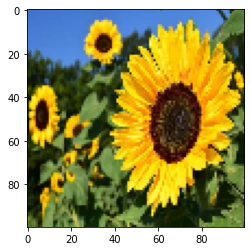

In [ ]:
import numpy as np
from tensorflow.keras.utils import load_img,img_to_array
img = load_img('/content/drive/MyDrive/AI_CNN/train/hoa hướng dương/Ý-nghĩa-của-hoa-hướng-dương - Copy (2).jpg', target_size = (100,100))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,100,100,3) 
img = img.astype('float32')
img = img/255
print(label[np.argmax(model.predict(img))])

/content


<IPython.core.display.Javascript object>